# Temporal b value pada data katalog

Jalankan file ini di Openquake yang sudah diinstal di komputer masing-masing.

atau:

Jalankan file ini di jupyter dengan cara mengubah kernel ke `openquake`. Jika kernel `openquake` belum ada, lakukan langkah-langkah berikut ini:

Openquake dapat diunduh di sini:
https://downloads.openquake.org/pkgs/windows/oq-engine/OpenQuake_Engine_3.11.5-1.exe

Install beberapa tambahan packages di openquake:

(Asumsi lokasi instalasi openquake di sini: `C:\Program Files\Openquake Engine\python3.6\`, 
jika tidak maka ubah lokasi tersebut sesuai dengan komputer masing-masing)

1. Buka Command Prompt
2. Install `jupyter`: `"C:\Program Files\Openquake Engine\python3.6\python.exe" -m pip install jupyter`
3. Daftarkan ke dalam kernel (opsional): `"C:\Program Files\Openquake Engine\python3.6\python.exe" -m ipykernel install --name "openquake" --display-name "openquake"`


Untuk uji coba, jalankan salah satu baris di bawah ini:

`"C:\Program Files\Openquake Engine\python3.6\Scripts\jupyter.exe" notebook`

atau

`"C:\Program Files\Openquake Engine\python3.6\Scripts\jupyter-notebook.exe"`

## 1. Import packages

Hal ini memastikan apakah python yang digunakan sudah menyediakan packages yang dibutuhkan.

In [1]:
from custom_openquake import *

# folder penyimpanan
dir_figs = os.path.join(os.getcwd(), 'figs')
os.makedirs(dir_figs, exist_ok=True)

## 2. Baca data katalog

In [25]:
catalogue = catalogue_from_pkl('dict_catalogue_fault_Enggano.pkl')

## 3. Menghitung ...

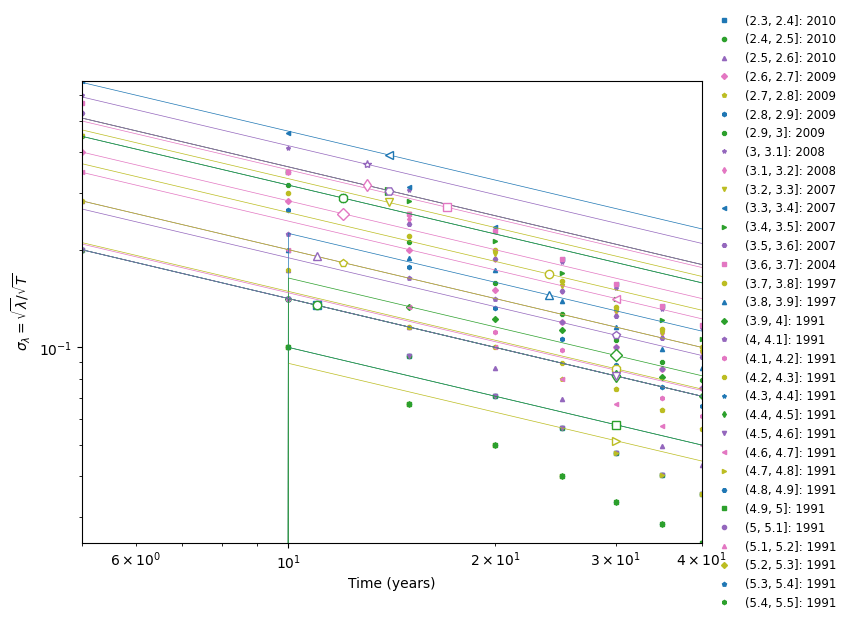

In [5]:
from openquake.hmtk.plotting.seismicity.completeness.plot_stepp_1972 import create_stepp_plot

comp_config = {'magnitude_bin': 0.1,
                'time_bin': 5. ,
                'increment_lock': True }

completeness_algorithm = Stepp1971()
completeness_table = completeness_algorithm.completeness(catalogue, comp_config)
create_stepp_plot(completeness_algorithm)

-+- ctime 2013.0  m_c 2.5
bval:  0.4792214972725536 sigma_b:  0.041683453046732634 neqi:  48 aval:  1.9250524711176462 sigma_a:  0.10420863261683166
-+- ctime 2013.0  m_c 2.6
bval:  0.5267571780503955 sigma_b:  0.05005342323069355 neqi:  47 aval:  2.0874240114274207 sigma_a:  0.13013890039980325
-+- ctime 2013.0  m_c 2.7
bval:  0.5858517937697822 sigma_b:  0.0617964075438092 neqi:  46 aval:  2.2903151654206613 sigma_a:  0.16685030036828463
-+- ctime 2013.0  m_c 2.8000000000000003
bval:  0.6014384129417005 sigma_b:  0.06137569376764154 neqi:  43 aval:  2.3632535023770234 sigma_a:  0.1718519425493965
-+- ctime 2013.0  m_c 2.5
bval:  0.48530056130579974 sigma_b:  0.04231639803275432 neqi:  49 aval:  1.9492049738536883 sigma_a:  0.10579099508188561
-+- ctime 2013.0  m_c 2.6
bval:  0.5345162854193867 sigma_b:  0.05106433671952153 neqi:  48 aval:  2.116741070026668 sigma_a:  0.13276727547075584
-+- ctime 2013.0  m_c 2.7
bval:  0.5959661503489871 sigma_b:  0.0634134500677088 neqi:  47 aval:  

-+- ctime 2016.0  m_c 2.7
bval:  0.5910516617618211 sigma_b:  0.051239417564275476 neqi:  46 aval:  2.4804460680548477 sigma_a:  0.13834642742354397
-+- ctime 2016.0  m_c 2.8000000000000003
bval:  0.6418145052757409 sigma_b:  0.05610558425986294 neqi:  45 aval:  2.672141878163775 sigma_a:  0.15709563592761588
-+- ctime 2016.0  m_c 2.5
bval:  0.5824357483250604 sigma_b:  0.05081092002123572 neqi:  46 aval:  2.3406959521105817 sigma_a:  0.12702730005308904
-+- ctime 2016.0  m_c 2.6
bval:  0.5824357483250604 sigma_b:  0.05081092002123572 neqi:  46 aval:  2.3989395269430878 sigma_a:  0.1321083920552124
-+- ctime 2016.0  m_c 2.7
bval:  0.5824357483250604 sigma_b:  0.05081092002123572 neqi:  46 aval:  2.457183101775594 sigma_a:  0.13718948405733578
-+- ctime 2016.0  m_c 2.8000000000000003
bval:  0.6314459349158744 sigma_b:  0.05553898546904254 neqi:  45 aval:  2.643109881156149 sigma_a:  0.15550915931331888
-+- ctime 2016.0  m_c 2.9000000000000004
bval:  0.7210927246695491 sigma_b:  0.071935

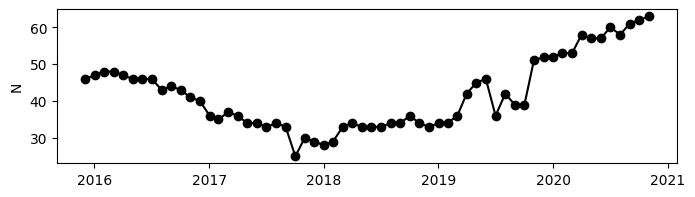

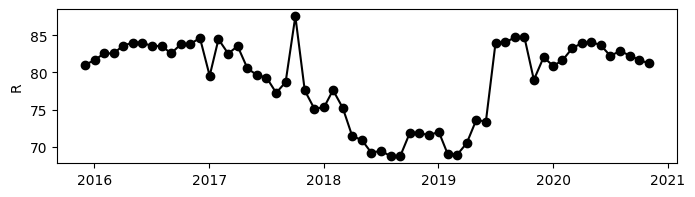

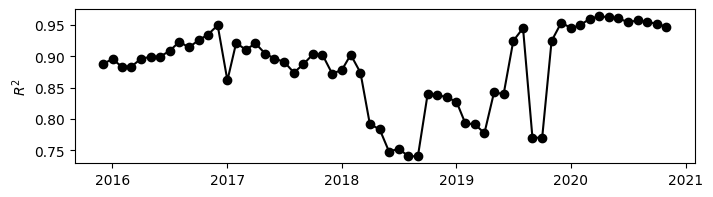

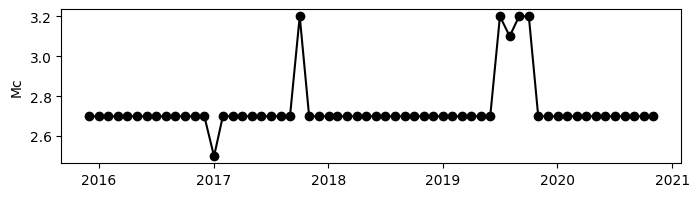

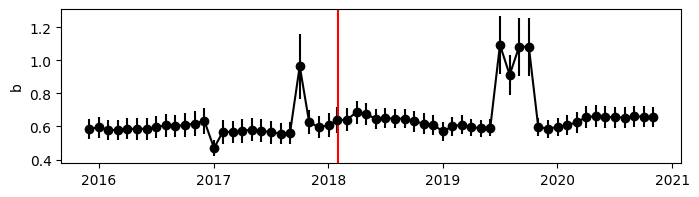

In [101]:
import datetime


fR = lambda obs, pred: 100 - np.sum(np.abs(obs - pred))*100/np.sum(obs)

mle_config = {'magnitude_interval': 0.1 ,
              'Average Type': 'Weighted',
              'reference_magnitude': None }

fN = lambda a, b, M: np.power(10, a - b*M)

Mc_all = []
b_all = []
sigma_b_all = []
R_all = []
R2_all = []
date_all = []
N_all = []
w = 3

m_c_range = np.r_[2.5:4.5:0.1] 

for yr in range(2016,2021):
    for mon in range(1,13):
        R_range = []
        m_c_tmp = None
        b_tmp = None
        sigma_b_tmp = None
        r2_tmp = None
        N_tmp = None
        for m_c in m_c_range:
            try:
                cat = deepcopy(catalogue)
                cat.sort_catalogue_chronologically()
                flags = [datetime.date(y, m, d) for y, m, d in zip(cat["year"], cat["month"], cat["day"])]
                flags = [((d >= datetime.date(yr - w, mon, 1)) and (d < datetime.date(yr, mon, 1)))for d in flags]
                cat.purge_catalogue(flags)

                b_val, sigma_b, a_val, sigma_a = b_a_value(cat, mle_config, np.array([[yr - w, m_c]]))

                rec_table = extract_recurrence_table(cat, mle_config['magnitude_interval'])
                rec_table_mc = extract_recurrence_table_Mc(cat, mle_config['magnitude_interval'], 
                                                               m_c, yr - w)
            #     plt.figure(figsize=(6,5))

            #     plt.plot(rec_table[:-1,0], rec_table[:-1,3], "b+", label="incremental FMD")
            #     plt.plot(rec_table[:-1,0], rec_table[:-1,4], "r+", label="cumulative FMD")

            #     plt.plot(rec_table_mc[:-1,0], rec_table_mc[:-1,3], "bo", label="incremental FMD\n(limited by Mc)")
            #     plt.plot(rec_table_mc[:-1,0], rec_table_mc[:-1,4], "ro", label="cumulative FMD\n(limited by Mc)")

                N = fN(a_val, b_val, rec_table[:-1,0])
                N_Mc = fN(a_val, b_val, rec_table_mc[:-1,0])
                R = fR(rec_table_mc[:-1,4], N_Mc)
                r2 = r_squared(np.log10(rec_table_mc[:-1,4]), np.log10(N_Mc))

            #     plt.plot(rec_table[:-1,0], N, c='black', 
            #              label=f"$log(N) = a - bM$\nb = {b_val:.2f}\na = {a_val:.2f}\n"+ \
            #              f"$\sigma_b$ = {sigma_b:.2f}\n$\sigma_a$ = {sigma_a:.2f}\n$R$ = {R:.2f}"
            #             )

            #     plt.semilogy()
            #     plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', labelspacing = 1)

                if R_range == []:
                    R_range.append(R)
                    m_c_tmp = m_c
                    b_tmp = b_val
                    sigma_b_tmp = sigma_b
                    r2_tmp = r2
                    N_tmp = np.sum(rec_table_mc[:,1])
                elif R >= R_range[-1]:
                    R_range.append(R)
                    m_c_tmp = m_c
                    b_tmp = b_val
                    sigma_b_tmp = sigma_b
                    r2_tmp = r2
                    N_tmp = np.sum(rec_table_mc[:,1])
                else:
                    break

            except:
                break

        R_all.append(max(R_range))
        Mc_all.append(m_c_tmp)
        N_all.append(N_tmp)
        b_all.append(b_tmp)
        R2_all.append(r2_tmp)
        sigma_b_all.append(sigma_b_tmp)
        date_all.append(datetime.date(yr, mon, 1) - datetime.timedelta(days=30))

# plt.figure(figsize=(6,5))
# plt.plot(m_c_range[0:len(R_range)], R_range, 'ko-')
# plt.show()

plt.figure(figsize=(8,2))
plt.plot(date_all, N_all, 'ko-')
plt.ylabel("N")
plt.figure(figsize=(8,2))
plt.plot(date_all, R_all, 'ko-')
plt.ylabel("R")
plt.figure(figsize=(8,2))
plt.plot(date_all, R2_all, 'ko-')
plt.ylabel("$R^2$")
plt.figure(figsize=(8,2))
plt.plot(date_all, Mc_all, 'ko-')
plt.ylabel("Mc")
plt.figure(figsize=(8,2))
plt.errorbar(date_all, b_all, yerr=sigma_b_all, marker='o', c='k')
plt.axvline(datetime.date(2018, 2, 1), c='r')
plt.ylabel("b")
plt.show()

# flags = (cat["year"] <= 2018) & (cat["month"] <= 2)
# cat.purge_catalogue(flags)
# print(np.array([cat["year"], cat["month"], cat["day"], cat["magnitude"]]).T)